# Visualização e estudo dos dados
## Bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import plotly.express as px
import plotly.figure_factory as pff
import plotly.graph_objects as pgo
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from statsmodels.stats import outliers_influence as outinf
from sklearn.metrics import mean_squared_error as mse

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


O dado foi obtido da biblioteca sklearn.datasets e conta com o dataset, um array com nome das colunas, o target e uma descrição dos parâmetros.

In [2]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# Incorporação dos dados em um dataframe pandas
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
# Adição dos dados MEDV (target) no dataframe
data['MEDV'] = boston.target

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Análise dos dados
Os dados já foram inseridos em um DataFrame Pandas, e agora devem ser analisados.
Inicialmente será feita análise descritiva, bem como análise do dataframe em busca de valores 0 e valores NaN.

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
for x in data.columns:
    if data[x].isin([0]).sum() > 0:
        print(f'isin0 {x} = {data[x].isin([0]).sum()}')
    if data[x].isna().sum() > 0:
        print(f'isna {x} = {data[x].isna().sum()}')

isin0 ZN = 372
isin0 CHAS = 471


- Nenhuma variável tem missing value;
- A variável CHAS é uma variável categórica binomial (0 ou 1), portanto é normal ter muitoz valores 0;
- A variável ZN é quantitativa contínua, e a quantidade de 0 pode atrapalhar o modelo de machine learning, por isso será excluida.

In [9]:
# Eliminando ZN
newcolumns = []
for x in data.columns:
    if x != 'ZN':
        newcolumns.append(x)
data = data[newcolumns]
data.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Análise da variável alvo
Tendo em vista que já excluimos as interferencias causadas por missing values ou por uma quantidade excessiva de zeros, vamos agora estudar nossa variável alvo MEDV.

In [10]:
data['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [11]:
fig = px.histogram(data, x=data['MEDV'])
fig.show()

In [12]:
fig = pff.create_distplot([data['MEDV']], group_labels = ['MEDV'])
fig.update_layout(width = 800, height = 500)
fig.show()

In [13]:
fig = px.box(data, y=data['MEDV'])
fig.show()

- Pode-se ver que tem alguns valores discrepantes em MEDV, incluindo o valor máximo que se destacou no final do histograma, tendo alguns casos;
- Além disso o boxplot considera limite superior como 37.

In [14]:
max_values = []
upper_fence_values = []
for i, v in enumerate(data['MEDV']):
    if v == 50:
        max_values.append(i)
    if v > 37:
        upper_fence_values.append(i)
# Número de imóveis cujo MEDV = 50, e cujo MEDV > 37
print(len(max_values))
print(len(upper_fence_values))

16
37


Criando dois dataframes:
- Em data_drop_max foram excluidos as linhas com valor MEDV = 50
- Em data_drop_upperfence foram excluidos todas as linhas com valor MEDV > upper_fence

In [0]:
data_drop_max = data.drop(max_values)
data_drop_upperfence = data.drop(upper_fence_values)

### Avaliando correlações
Agora que já conhecemos nossa variável alvo e tratamos os valores discrepantes, iremos avaliar as correlações entre as variáveis do dataframe

In [0]:
corrDropMax = data_drop_max.corr()

In [0]:
corrDropUpper = data_drop_upperfence.corr()

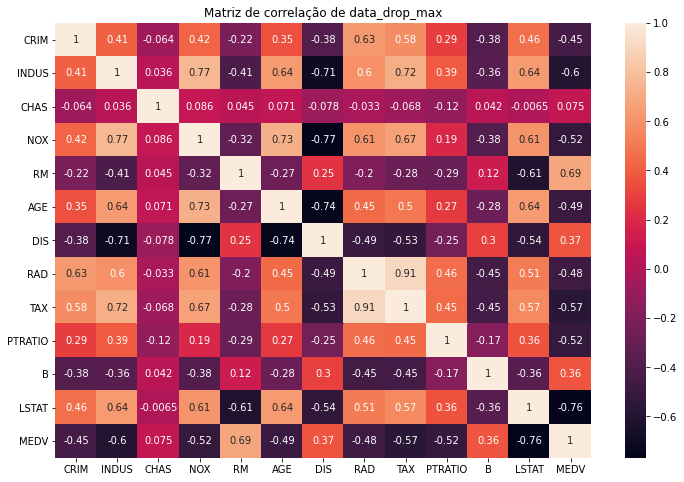

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corrDropMax, annot=True)
plt.title('Matriz de correlação de data_drop_max')
plt.show()

In [19]:
px.scatter(data_drop_max, x='MEDV', y='LSTAT')

In [20]:
px.scatter(data_drop_max, x='MEDV', y='RM')

In [21]:
px.scatter(data_drop_max, x='MEDV', y='TAX')

In [22]:
px.scatter(data_drop_max, x='MEDV', y='PTRATIO')

#### Devido a perda de algumas correlações importantes, o dataset utilizado daqui pra frente será data_drop_max.

#### Pode-se observar algumas correlações importantes.
- LSTAT, RM, TAX e INDUS tem uma boa correlação com MEDV, sendo importantes para o nosso modelo de MachineLearning;
- Entretanto ao plotar os dados no ScatterPlot pode-se ver que TAX e INDUS não apresentam uma linearidade boa em valores muito altos ou muito baixos, apenas no centro.
- RAD e TAX tem uma correlação extremamente forte (0.91);
- DIS, AGE e INDUS tem alta correlação com diversos parâmetros;
- B, CHAS e CRIM apresentam correlação muito baixa com a variável alvo.

Pode-se retirar RAD, TAX, AGE, INDUS e DIS para ver se diminuem essas multicolinearidades que podem prejudicar o modelo.

Pode-se retirar também B, CHAS e CRIM, pois apresentam correlação muito baixa com a variável alvo.



In [23]:
data_drop_max.columns

Index(['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [0]:
dataML = data_drop_max[['NOX', 'RM', 'PTRATIO', 'LSTAT', 'MEDV']]

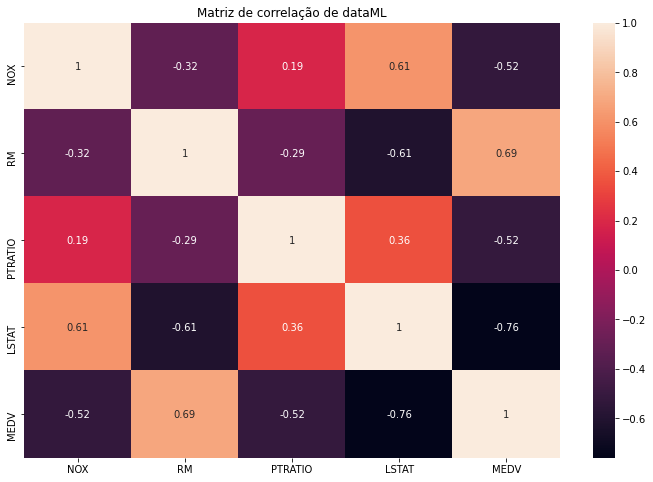

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(dataML.corr(), annot=True)
plt.title('Matriz de correlação de dataML')
plt.show()

In [0]:
# Exportanto dataML para um CSV
dataML.to_csv('dataML.csv')

## Treinar modelos de Machine Learning
Usaremos os dados contidos em dataML para treinar os modelos de Machine Learning

### Separando dados de Treino e Teste

In [0]:
from sklearn.model_selection import train_test_split
# x columns
xcolumns = []
ycolumns = ['MEDV']
for i in dataML.columns:
    if i not in ycolumns:
        xcolumns.append(i)

#train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataML[xcolumns], dataML[ycolumns])

### Definição de funções para ajudar na construção e avaliação dos modelos

In [0]:
def mlModel(modelName, modelFunction, x_train = x_train, x_test = x_test, y_train = y_train, y_test = y_test, **kwargs):
    """
    -> Função para treinamento e avaliação (RMSE) de modelos de ML.
    modelName = .str com nome do modelo
    modelFunction = Nome do modelo utilizado
    x_train = df contendo x para treino
    x_test = df contendo x para teste
    y_train = df contendo y para treino
    x_test = df contendo y para teste
    **kwargs = argumentos aplicados em modelFunction()
    return array com predições
    """
    model = modelFunction(**kwargs)
    model.fit(x_train, y_train)
    model_predict = model.predict(x_test)
    RMSE = math.sqrt(mse(y_test, model_predict))
    print(f'O RMSE do meu modelo {modelName} foi {RMSE}.')
    return model_predict

def rmseDF(y_test = y_test, **predictions):
    """
    -> Função para retornar um dataframe com o nome dos modelos treinados e o seu RMSE.
    y_test = dataframe com os valores reais
    **predictions = valores preditos nos modelos
    return DataFrame
    """
    df = pd.DataFrame()
    modelList = []
    rmseList = []
    for i in predictions:
        RMSE = round(math.sqrt(mse(y_test, predictions[i])), 3)
        modelList.append(i)
        rmseList.append(RMSE)
    df['Modelo'] = modelList
    df['RMSE'] = rmseList
    return df

def predictDF(y_test=y_test, **predictions):
    """
    -> Função que retorna um DataFrame com os valores reais e os valores predictos pelos modelos de Machine Learning.
    y_test = dataframe com os valores reais
    **predictions = valores preditos nos modelos
    return DataFrame
    """
    df = pd.DataFrame()
    for c in y_test.columns:
        df[c] = y_test[c]
    for m in predictions:
        df[m] = predictions[m]
    return df

### Baseline
Agora que já temos os datasets de treino e teste, podemos trabalhar no Baseline usando o modelo DummyRegressor da biblioteca sklearn.

In [35]:
from sklearn.dummy import DummyRegressor
models = {} # Dicionário que será usado para guardar os modelos

baseline = mlModel('baseline', DummyRegressor)
models['Baseline'] = baseline

O RMSE do meu modelo baseline foi 8.202899121332548.


In [41]:
from sklearn.linear_model import LinearRegression

linreg = mlModel('LinReg', LinearRegression)
models['Linear Regression'] = linreg

O RMSE do meu modelo LinReg foi 4.274802470201529.


In [63]:
from sklearn.svm import LinearSVR

linearsvr = mlModel('LinearSVR', LinearSVR, y_train = np.ravel(y_train), y_test = np.ravel(y_test))
models['LinearSVR'] = linearsvr

O RMSE do meu modelo LinearSVR foi 4.44930074311545.


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [62]:
from sklearn.svm import SVR

svr = mlModel('SVR', SVR, y_train = np.ravel(y_train), y_test = np.ravel(y_test))
models['SVR'] = svr

O RMSE do meu modelo SVR foi 4.736149566181618.


In [49]:
from sklearn.neighbors import KNeighborsRegressor

knr = mlModel('KNR', KNeighborsRegressor)
models['KNeighborsReg'] = knr

O RMSE do meu modelo KNR foi 3.382348729334287.


In [52]:
from sklearn.cross_decomposition import PLSRegression

plsr = mlModel('PLSR', PLSRegression)
models['PLSReg'] = plsr

O RMSE do meu modelo PLSR foi 4.256963798374514.


In [53]:
from sklearn.tree import DecisionTreeRegressor

dtr = mlModel('DecTreeReg', DecisionTreeRegressor)
models['DecTreeReg'] = dtr

O RMSE do meu modelo DecTreeReg foi 4.182687897606094.


In [61]:
from sklearn.ensemble import RandomForestRegressor

rfr = mlModel('RandomForest', RandomForestRegressor, y_train = np.ravel(y_train), y_test = np.ravel(y_test))
models['RandomForest'] = rfr

O RMSE do meu modelo RandomForest foi 2.8964507745568353.


In [64]:
from sklearn.ensemble import VotingRegressor

vreg = mlModel('VotingReg', VotingRegressor, y_train = np.ravel(y_train), y_test = np.ravel(y_test), estimators=[('ln', LinearRegression()), ('rf', RandomForestRegressor())])
models['VotingReg'] = vreg

O RMSE do meu modelo VotingReg foi 3.3004575711539927.


In [72]:
from sklearn.neural_network import MLPRegressor

mlpr = mlModel('MLPReg', MLPRegressor, y_train = np.ravel(y_train), y_test = np.ravel(y_test), max_iter=1000)
models['MLPReg'] = mlpr

O RMSE do meu modelo MLPReg foi 3.5402453349816607.


In [73]:
rmsedf = rmseDF(**models)
rmsedf

,Modelo,RMSE
0,Baseline,8.203
1,LinearSVR,4.449
2,Linear Regression,4.275
3,SVR,4.736
4,KNeighborsReg,3.382
5,PLSReg,4.257
6,DecTreeReg,4.183
7,RandomForest,2.896
8,VotingReg,3.300
9,MLPReg,3.540


In [102]:
predDF

,MEDV,Baseline,LinearSVR,Linear Regression,SVR,KNeighborsReg,PLSReg,DecTreeReg,RandomForest,VotingReg,MLPReg
32,13.2,21.681744,11.442577,11.689565,11.557578,8.74,12.258519,19.1,15.207,13.100783,12.619515
410,15.0,21.681744,18.378477,19.173122,21.440440,19.80,18.754538,18.2,20.166,19.731061,19.439785
247,20.5,21.681744,22.022425,23.267208,22.264990,21.84,23.300078,20.8,21.863,22.568604,21.363433
104,20.1,21.681744,19.462198,19.659870,19.543503,20.26,19.515456,19.6,20.841,20.192435,19.886878
6,22.9,21.681744,22.092249,24.524854,22.493246,20.82,24.751775,18.9,19.908,22.258927,22.043595
...,...,...,...,...,...,...,...,...,...,...,...
176,23.2,21.681744,22.291237,24.336345,23.660291,21.44,24.370142,24.0,21.942,22.872172,22.119623
127,16.2,21.681744,14.264813,14.579934,15.783800,16.30,14.397432,15.6,15.305,14.881967,15.319630
133,18.4,21.681744,15.945310,16.052039,17.301700,18.18,15.782907,15.6,16.718,16.313019,16.997590
423,13.4,21.681744,14.619340,14.492587,12.813267,11.12,14.790450,12.0,12.727,13.662293,13.534821


In [101]:
fig = pgo.Figure()
for c in predDF.columns:
  fig.add_trace(pgo.Scatter(x=sorted(predDF.index), y=predDF[c], mode='lines+markers', name=c))
fig.show()